In [7]:
import pandas as pd
import matplotlib.pyplot as plt

Read data from file:

In [2]:
df = pd.read_csv('Data1.csv', index_col=0)

Plot all columns:

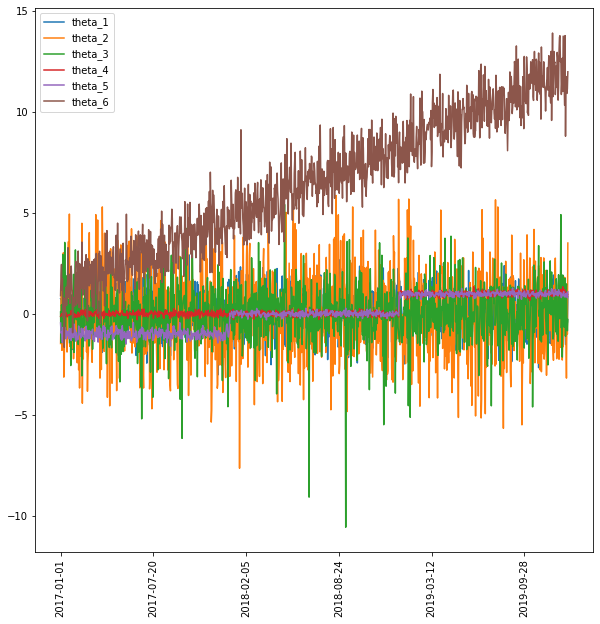

In [5]:
df.plot(rot=90, figsize=(10, 10));

Plot histograms of all columns:

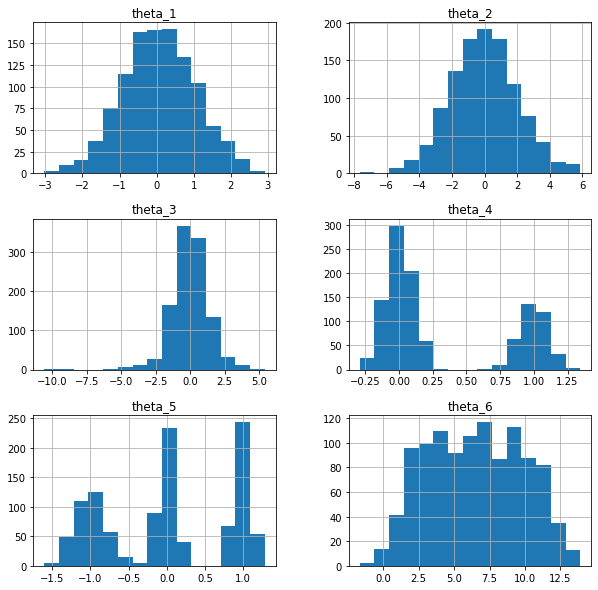

In [6]:
df.hist(figsize=(10, 10), bins=15);

Plot Kernel Denisty Estimators for all columns:

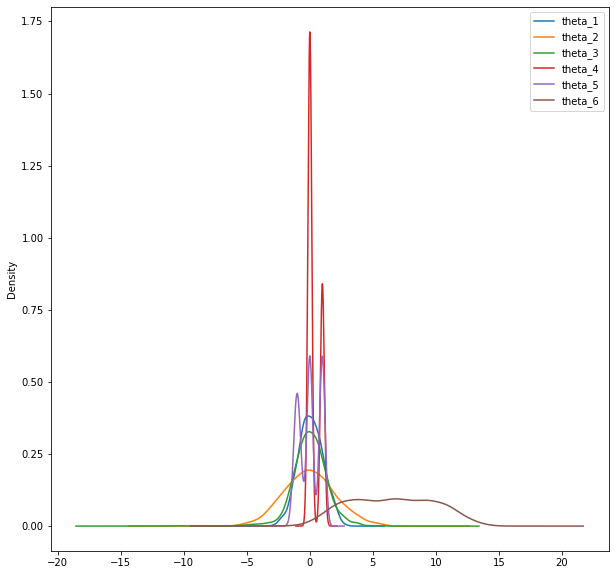

In [7]:
df.plot(kind='kde', figsize=(10, 10));

Repeat analysis for 'theta_1' - 'theta_4' columns in 2018:

In [9]:
filt = pd.to_datetime(df.index).year == 2018
df2 = df.loc[filt, ['theta_1', 'theta_2', 'theta_3', 'theta_4']]

Plot all columns:

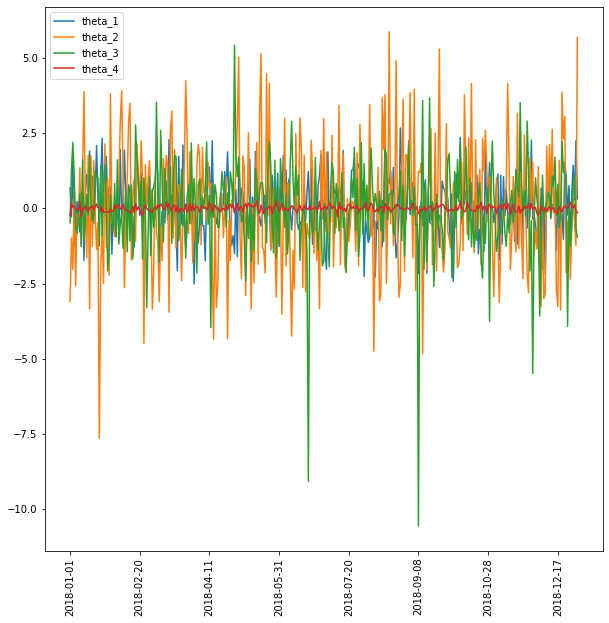

In [10]:
df2.plot(rot=90, figsize=(10, 10));

Plot histograms of all columns:

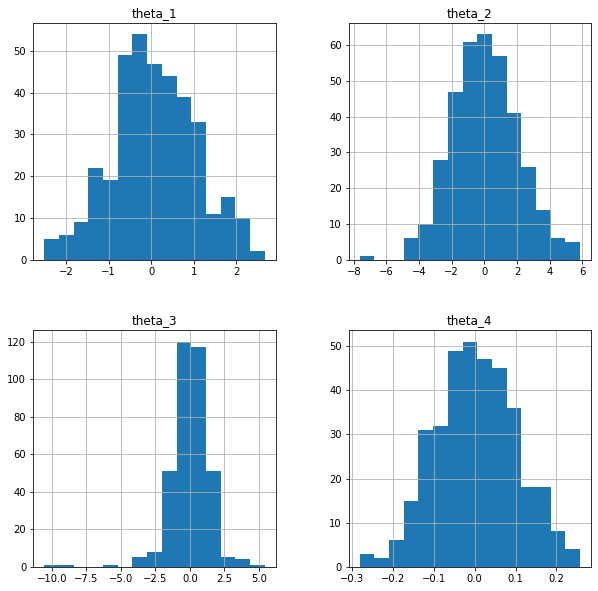

In [11]:
df2.hist(figsize=(10, 10), bins=15);

Plot Kernel Denisty Estimators for all columns:

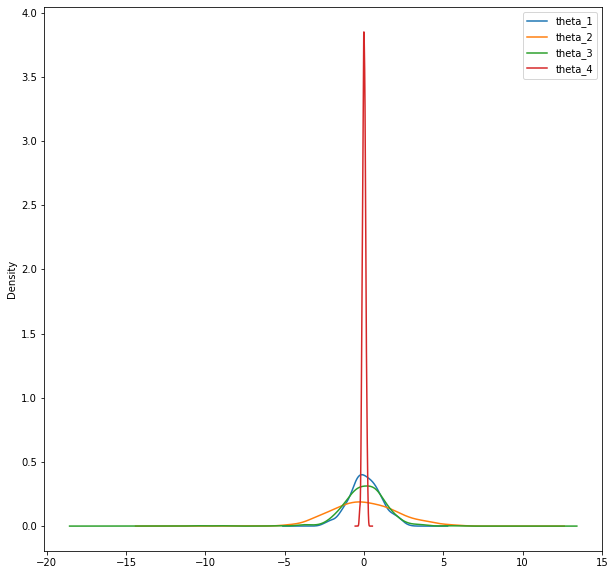

In [12]:
df2.plot(kind='kde', figsize=(10, 10));

In [2]:
from cmdstanpy import cmdstan_path, set_cmdstan_path, CmdStanModel

In [3]:
set_cmdstan_path('/home/jaqb/Documents/cmdstan-2.26.1')
cmdstan_path()

'/home/jaqb/Documents/cmdstan-2.26.1'

Create a dataset containing 5 zeros and 9 ones:

In [10]:
dataset = {
    'N' : 14,
    'y' : [0,1,1,0,0,1,1,0,1,1,0,1,1,1]
}

Create a cmdstanpy model from bern_1.stan:

In [11]:
model = CmdStanModel(stan_file='bern_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /home/jaqb/Documents/stan/Data-Analytics-Course/lab1/bern_1


Sample from a model using the dataset:

In [12]:
model_fit = model.sample(data=dataset)

INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 4


Extract theta and create its histogram:

In [13]:
theta = model_fit.stan_variable('theta')

In [14]:
theta_series = pd.Series(theta)

In [15]:
theta_desciption = theta_series.describe(percentiles=[0.05,0.5,0.95])

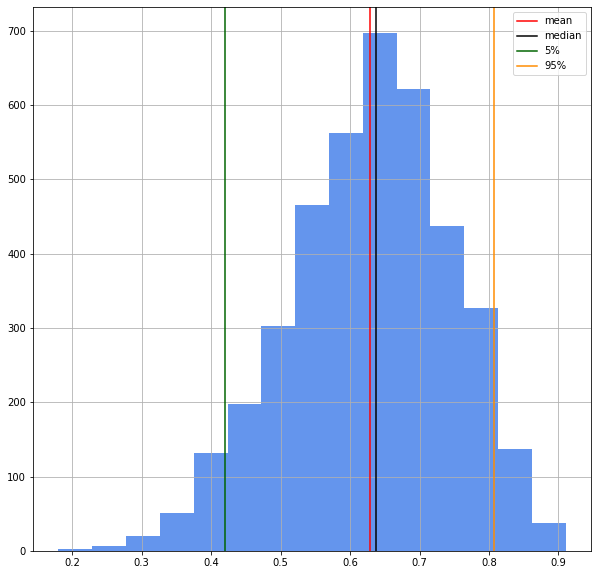

In [21]:
plt.figure(figsize=(10,10))
plt.hist(theta_series, bins=15, color='cornflowerblue')
plt.axvline(x=theta_desciption['mean'], color='red')
plt.axvline(x=theta_desciption['50%'], color='black')
plt.axvline(x=theta_desciption['5%'], color='darkgreen')
plt.axvline(x=theta_desciption['95%'], color='darkorange')
plt.grid()
plt.legend(['mean', 'median', '5%', '95%']);